<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

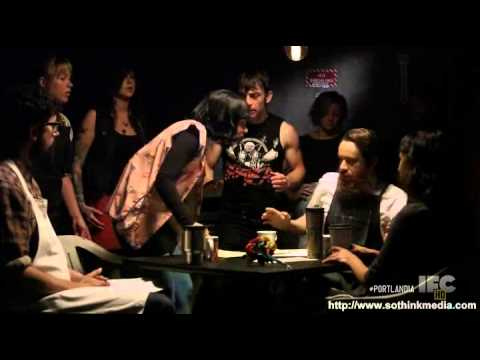

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
!pip install spacy squarify

In [29]:
import pandas as pd
 
shops = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 
df = shops
df['rating'] = df['star_rating'].apply(lambda x: x.replace(' star rating', '')).astype('float')
df['date'] = df['full_review_text'].apply(lambda x: x.split()[0])
df['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))
del df['star_rating']
df.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [5]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [6]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos!= 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas        

In [7]:
df['tokens'] = df['full_review_text'].apply(get_lemmas)

In [8]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

# How do we want to analyse these coffee shop tokens?
 - Overall Word/Token Count
 - View Counts by Rating

In [9]:
wc = count(shops['tokens'])

In [10]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,coffee,4848,10153,1.0,0.028057,0.028057,0.636555
134,place,3879,6026,2.0,0.016652,0.044709,0.509322
149,good,3590,5393,3.0,0.014903,0.059612,0.471376
103,great,2843,3924,4.0,0.010844,0.070456,0.373293
35,check,3175,3467,5.0,0.009581,0.080037,0.416886


In [11]:
import squarify
import matplotlib.pyplot as plt

# This is showing Overall Word Counts
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
shops['coffee_shop_name'].nunique()

79

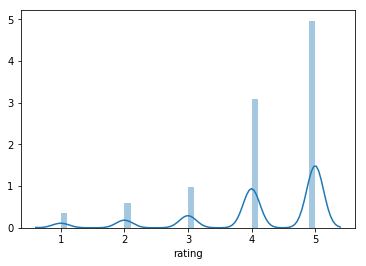

In [13]:
# Lets look at Bad Coffee Shops

# What is a 'bad' coffee shop?
import seaborn as sns

sns.distplot(shops['rating'])

In [14]:
# A bad coffee shop has a rating of between 1 and 3 based on the distribution of ratings. 

In [15]:
wc_bad = count(shops[shops['rating'] <4]['tokens'])

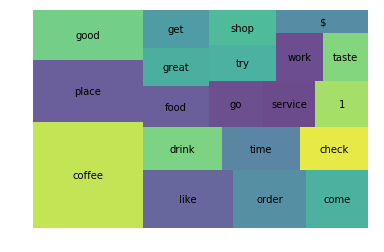

In [16]:
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8)
plt.axis('off')
plt.show()

In [17]:
wc_good = count(shops[shops['rating'] >= 4]['tokens'])

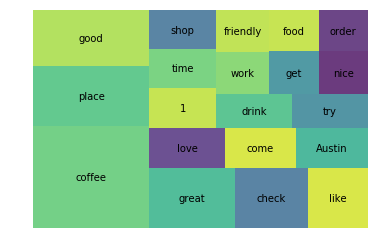

In [18]:
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8)
plt.axis('off')
plt.show()

## Can Visualize the words with the greatest difference in counts between 'good' and 'bad'?

Couple Notes:

- Relative frequency of absolute counts because of different # of reviews
- only look at the top 5-10 words with the greatest differences

In [19]:
wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_pct']
diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct_bad']], how='outer')

In [20]:
diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,coffee,0.637785,0.631436
1,place,0.508958,0.510840
2,good,0.480130,0.434959
3,great,0.406678,0.234417
4,check,0.437459,0.331301


In [21]:
diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']
diff.head()

,word,appears_in_pct,appears_in_pct_bad,diff
0,coffee,0.637785,0.631436,0.006349
1,place,0.508958,0.510840,-0.001882
2,good,0.480130,0.434959,0.045171
3,great,0.406678,0.234417,0.172260
4,check,0.437459,0.331301,0.106158


In [22]:
diff.sort_values(by='diff')

,word,appears_in_pct,appears_in_pct_bad,diff
5,like,0.273127,0.403794,-0.130667
19,order,0.166287,0.292005,-0.125719
139,ask,0.050651,0.149051,-0.098400
36,service,0.138274,0.234417,-0.096144
209,bad,0.036645,0.128726,-0.092081
26,go,0.140228,0.228320,-0.088092
49,taste,0.106026,0.189702,-0.083676
87,$,0.064169,0.147696,-0.083527
161,customer,0.044788,0.126016,-0.081228
150,say,0.047231,0.126016,-0.078785


In [23]:
count(shops['tokens']).sort_values('count', ascending=False)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,coffee,4848,10153,1.0,0.028057,0.028057,0.636555
134,place,3879,6026,2.0,0.016652,0.044709,0.509322
149,good,3590,5393,3.0,0.014903,0.059612,0.471376
103,great,2843,3924,4.0,0.010844,0.070456,0.373293
35,check,3175,3467,5.0,0.009581,0.080037,0.416886
158,like,2273,3379,6.0,0.009338,0.089374,0.298451
441,come,1933,2639,7.0,0.007293,0.096667,0.253808
487,time,1763,2382,8.0,0.006582,0.103249,0.231486
25,drink,1638,2343,9.0,0.006475,0.109724,0.215074
32,love,1799,2339,10.0,0.006464,0.116187,0.236213


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 



In [24]:
dir(nlp)

['Defaults',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_meta',
 '_optimizer',
 '_path',
 'add_pipe',
 'begin_training',
 'create_pipe',
 'disable_pipes',
 'entity',
 'evaluate',
 'factories',
 'from_bytes',
 'from_disk',
 'get_pipe',
 'has_pipe',
 'lang',
 'linker',
 'make_doc',
 'matcher',
 'max_length',
 'meta',
 'parser',
 'path',
 'pipe',
 'pipe_names',
 'pipeline',
 'preprocess_gold',
 'rehearse',
 'remove_pipe',
 'rename_pipe',
 'replace_pipe',
 'resume_training',
 'tagger',
 'tensorizer',
 'to_bytes',
 'to_disk',
 'tokenizer',
 'update',
 'use_params',
 'vocab']

In [25]:
# Extracting Named Entities
from spacy import extract_entity
spacy_extract_entity()

ImportError: cannot import name 'extract_entity' from 'spacy' (/Users/Inceptive/anaconda3/lib/python3.7/site-packages/spacy/__init__.py)

In [ ]:
# Extracting Noun Chunks 

In [ ]:
# Attempt Document Classification with just Spacy 

In [ ]:
!pip install gensim
from gensim.models import Word2Vec, KeyedVectors
import pandas 
import nltk

In [ ]:
texts = df['full_review_text'].values

In [ ]:
texts

In [ ]:
textVec = [nltk.word_tokenize(text) for text in texts]

In [ ]:
model = Word2Vec(textVec, min_count=1, size=32)

In [ ]:
model.most_similar('Good')

## Presentation for Genuine Joe and how he can improve his coffee shop business

In [87]:
import pandas as pd
 
shops = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [88]:
# pretend TL is an owner

# we are to bring a presentation of recommendations with charts and graphs 
# recommending what they should do to improve sales, product, their shop etc
# VALUABLE SKILLS 

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [89]:
# Getting all the 'Genuine Joe' observations for our TL groups presentations
shops = shops[shops['coffee_shop_name'].str.contains('Genuine')]

In [90]:
# Cleaning up the data to be more useable for our purposes 
df = shops
df['rating'] = df['star_rating'].apply(lambda x: x.replace(' star rating', '')).astype('float')
df['date'] = df['full_review_text'].apply(lambda x: x.split()[0])
df['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))
df['full_review_text'] = df['full_review_text'].map(lambda x: x.lower())
del df['star_rating']

df.head()

,coffee_shop_name,full_review_text,rating,date
5241,Genuine Joe,seriously the best iced chai in austin. i am n...,5.0,11/27/2016
5242,Genuine Joe,room nice. plain coffee meh. they have intrigu...,4.0,11/6/2016
5243,Genuine Joe,1 check-in the artist group i belong to had a ...,4.0,8/25/2016
5244,Genuine Joe,1 check-in i came here because it was the high...,4.0,6/9/2016
5245,Genuine Joe,hands down my favorite coffee shop in austin. ...,5.0,11/23/2016


In [91]:
# Getting the NLP locked and loaded
import spacy
nlp = spacy.load('en_core_web_lg')

In [92]:
nlp.Defaults.stop_words |= {' ', ',', ', ', 'coffee', 'place', 'good', 'like', 'work', 'shop', 'austin', '1',
                                            'get', 'love', 'genuine', 'nice', 'great', 'get', 'drink', 'joe',
                           'in'}

In [93]:
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)

12

In [94]:
print(nlp.Defaults.stop_words)

{'say', 'nice', 'on', 'noone', 'her', 'per', 'should', 'what', 'fifteen', 'yourself', 'every', 'forty', 'must', 'is', 'yours', 'him', 'perhaps', 'top', '’re', 'neither', 'down', 'thereafter', 'once', '‘ve', 'there', 'somehow', 'seemed', 'such', 'since', 'whereas', 'namely', 'just', 'latter', 'using', '‘d', 'anywhere', 'may', 'can', 'regarding', 'against', 'otherwise', 'someone', 'hers', 'therein', 'great', 'or', 'who', "'ve", 'ca', 'ever', 'back', 'across', 'nevertheless', 'seeming', '’ve', 'nor', 'more', 'joe', 'after', 'have', 'if', 'off', 'whatever', 'from', 'put', 'whenever', 'until', 'eight', 'he', 'work', 'but', 'thereby', 'about', 'being', 'enough', 'name', 'except', 'it', 'nine', 'she', 'whence', 'could', 'nothing', 'upon', 'of', 'thus', 'yet', 'cannot', 'hence', 'the', 'me', 'into', 'beyond', 'nowhere', '’ll', 'in', 'we', 'call', 'latterly', 'below', 'between', "'m", 'rather', '1', 'drink', 'were', 'side', 'due', '‘ll', 'for', 'whole', 'wherein', 'beforehand', 'up', 'their', '

In [95]:
# Use the get_lemmas function from lecture
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos!= 'PRON'):
            #if token.lemma_ == 'coffee':
             #   print(token.is_stop)
            lemmas.append(token.lemma_)
            
    return lemmas 

In [96]:
# creating a tokens columns seperate from full_review_text for... tokens
# AND applying the get_lemmas function from lecture
df['tokens'] = df['full_review_text'].apply(get_lemmas)

In [97]:
df['tokens']

5241    [seriously, good, ice, chai, fan, tired, regul...
5242    [room, plain, meh, intriguing, mocha, headline...
5243    [check, artist, group, belong, planning, meeti...
5244    [check, come, high, rate, near, time, happy, b...
5245    [hand, favorite, vibe, perfect, varied, seatin...
5246    [check, cozy, somewhat, closer, live, wifi, wo...
5247    [sunday, morning, breakfast, taco, breakfast, ...
5248    [list, work, like, atmosphere, small, expect, ...
5249    [check, eh, find, randomly, try, find, hour, w...
5250    [4, check, in, good, ppl, drink, whip, vibe, t...
5251    [have, recent, need, thinkin, tea, drinkin, ge...
5252    [way, lay, subversive, edge, recommend, gay, f...
5253    [time, visit, family, hit, breakfast, burrito,...
5254    [2, check, in, absolutely, authentic, joint, s...
5255    [wife, come, decor, ambiance, coffee, barista,...
5256    [bit, time, morning, look, glad, find, spot, c...
5257    [check, huge, fan, grungy, hipster, pull, grun...
5258    [sit, 

In [98]:
# Creating the count function from lecture, and creating the word count Dataframe 
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [99]:
wc = count(df['tokens'])
wc.head(40)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
74,room,27,45,1.0,0.012094,0.012094,0.27
118,check,42,43,2.0,0.011556,0.023650,0.42
138,come,21,29,3.0,0.007794,0.031443,0.21
15,chai,16,28,4.0,0.007525,0.038968,0.16
104,time,23,28,5.0,0.007525,0.046493,0.23
19,people,23,27,6.0,0.007256,0.053749,0.23
57,get,21,26,7.0,0.006987,0.060736,0.21
202,friendly,24,25,8.0,0.006719,0.067455,0.24
106,meeting,16,23,9.0,0.006181,0.073636,0.16
89,cool,18,23,10.0,0.006181,0.079817,0.18


In [100]:
# Now for analysis of coffee shops overall
df['rating'].value_counts()

5.0    40
4.0    35
3.0    11
2.0     8
1.0     6
Name: rating, dtype: int64

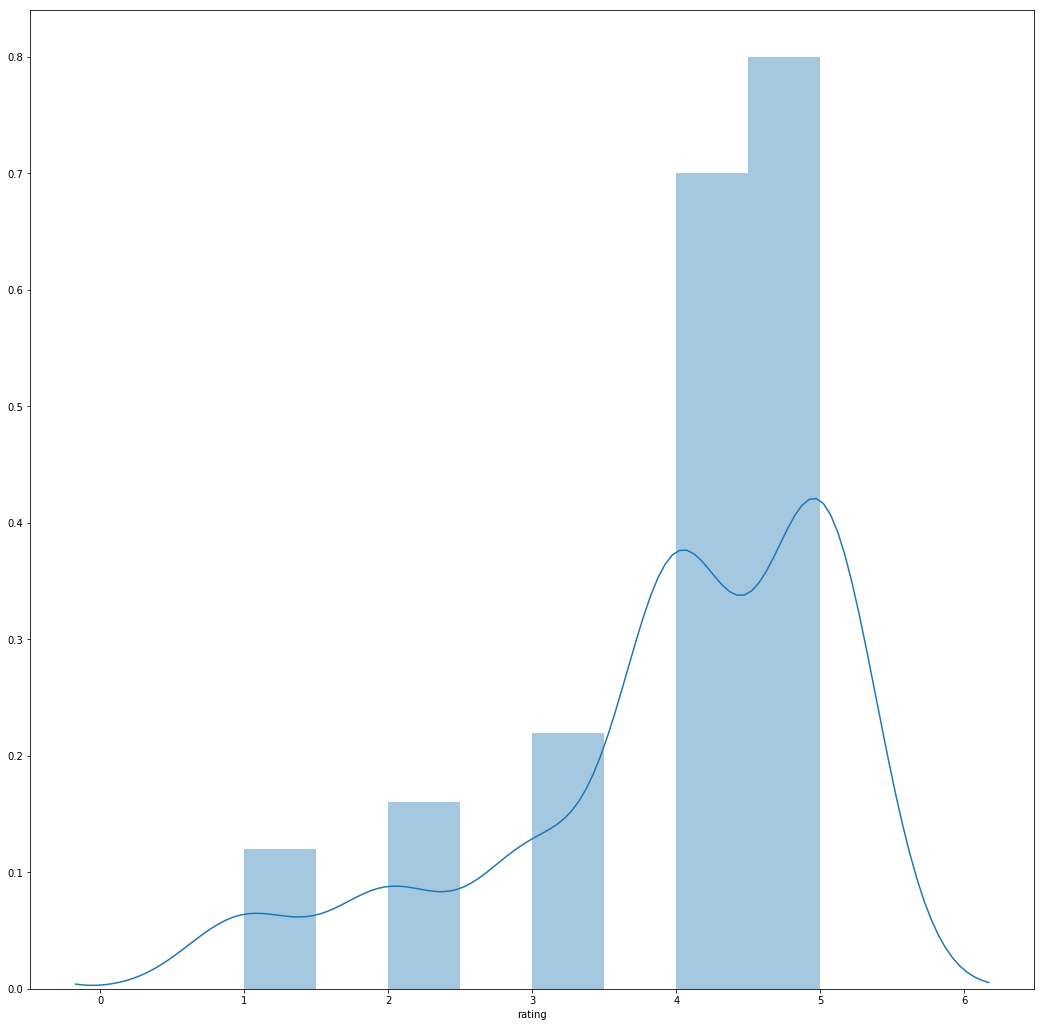

In [101]:
import seaborn as sns
sns.distplot(df['rating'])

In [102]:
# examining the Language used in two seperate dataframes, one for good(4 star ratings or higher), and bad(lower than 4 star )
wc_bad = count(df[df['rating'] < 4]['tokens'])
wc_good= count(df[df['rating'] >= 4]['tokens'])

<Figure size 1152x432 with 0 Axes>

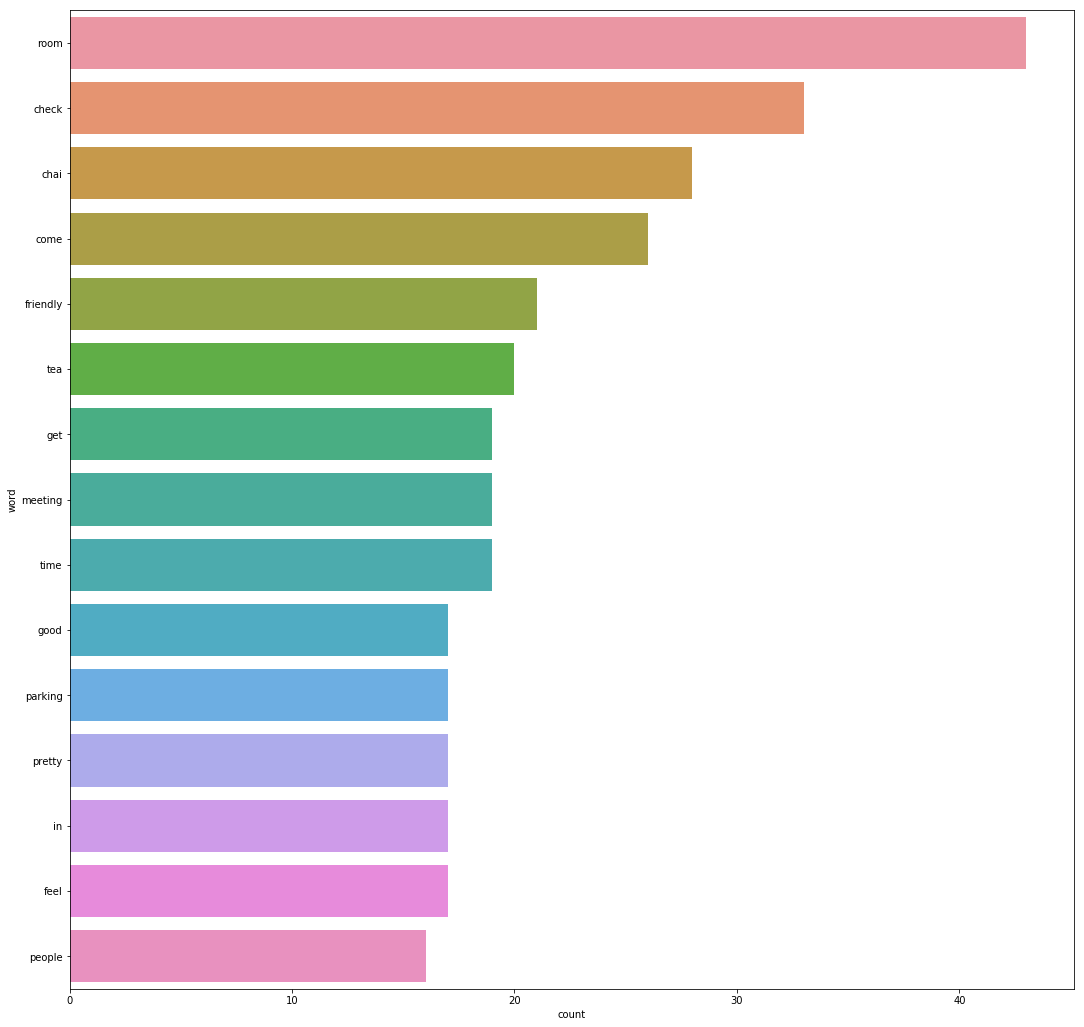

<Figure size 1152x432 with 0 Axes>

In [103]:
# Barplots for Good
sns.barplot(x='count', y='word', data = wc_good[wc_good['count'] > 15])
plt.figure(figsize=(16, 6))


<Figure size 1152x432 with 0 Axes>

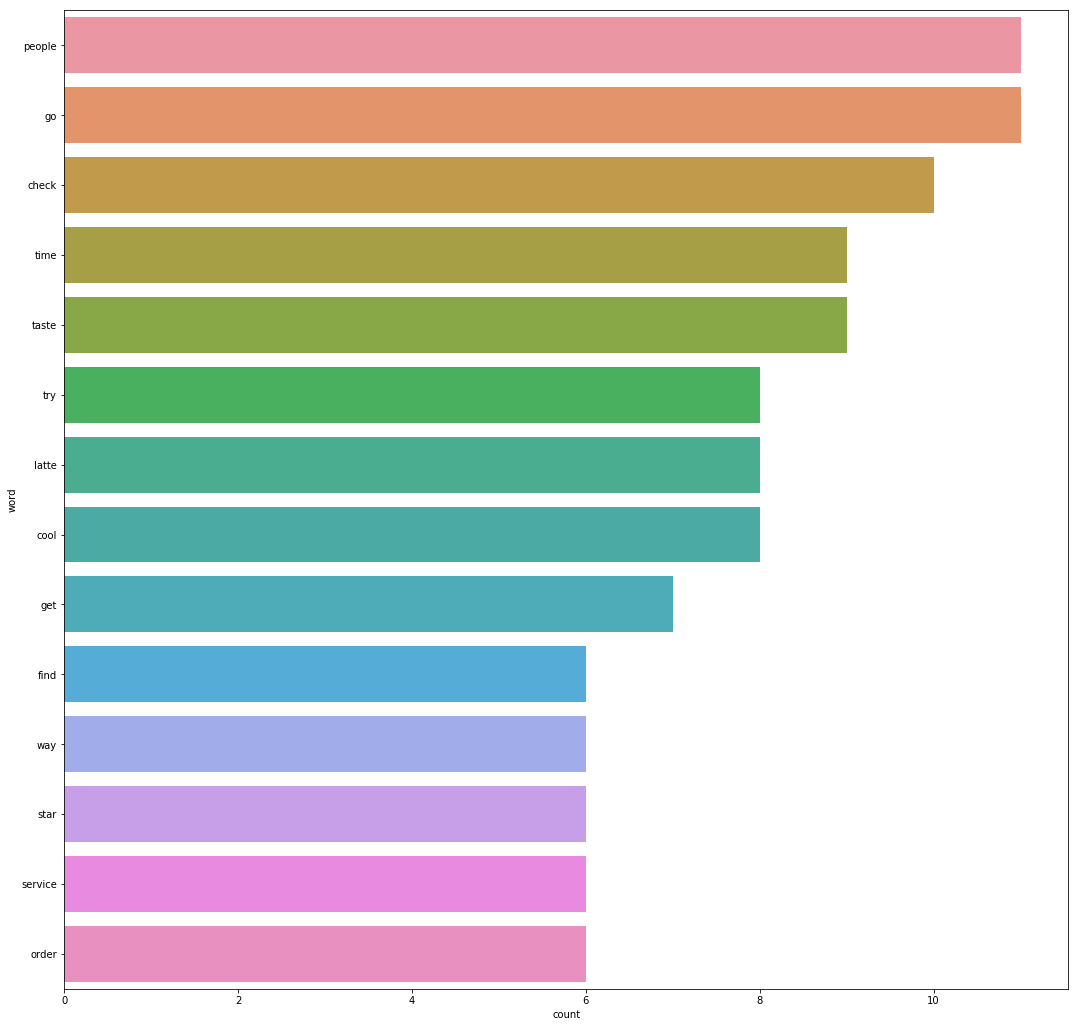

<Figure size 1152x432 with 0 Axes>

In [104]:
# Bar chart for Bad
sns.barplot(x='count', y='word', data = wc_bad[wc_bad['count'] > 5])
plt.figure(figsize=(16, 6))


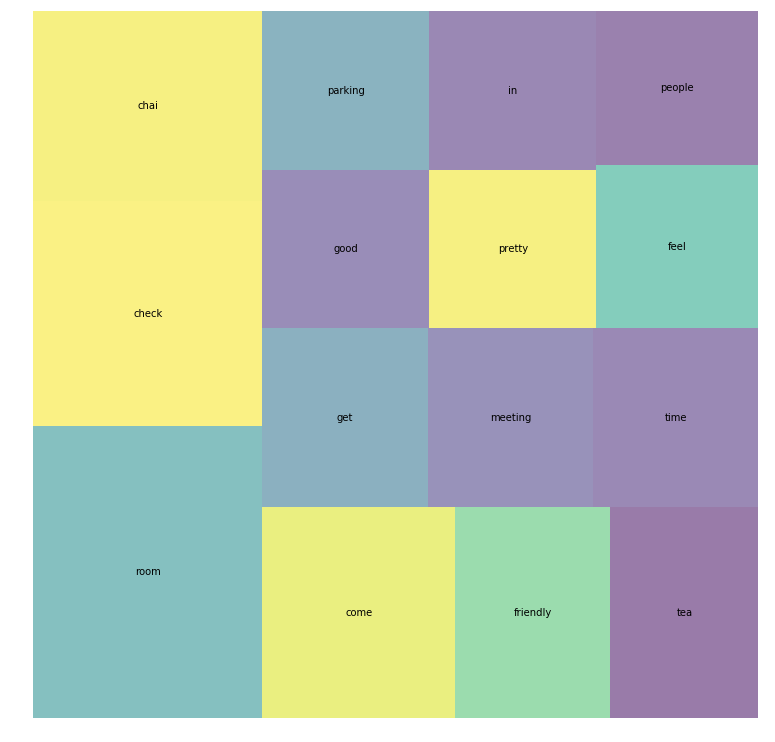

In [110]:
# Squarify plot for Good Reviews
import squarify
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


wcgood_square = wc_good[wc_good['count'] > 15]
squarify.plot(sizes=wcgood_square['pct_total'], label=wcgood_square['word'], alpha=.55)
fig_size = plt.rcParams["figure.figsize"]
plt.axis('off')
fig_size[0] = 13
fig_size[1] = 13
plt.show()

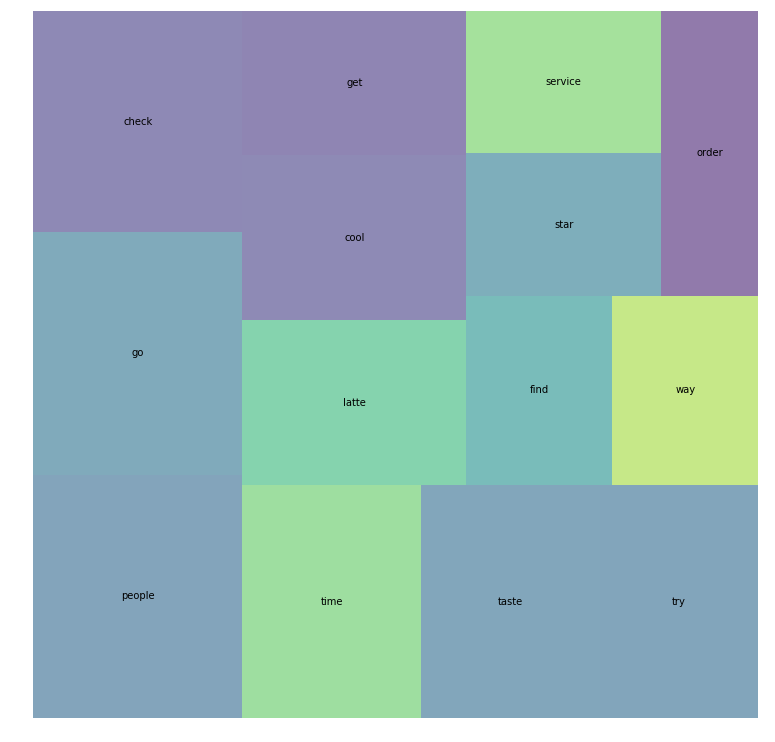

In [114]:
# Squarify Plot for Bad Reviews
wcgood_square = wc_bad[wc_bad['count'] > 5]
squarify.plot(sizes=wcgood_square['pct_total'], label=wcgood_square['word'], alpha=.6)
fig_size = plt.rcParams["figure.figsize"]
plt.axis('off')
fig_size[0] = 13
fig_size[1] = 13
plt.show()